In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import geopandas as gpd

In [2]:
# URL of the JSON file
url = "https://cycling.data.tfl.gov.uk/CyclingInfrastructure/data/lines/advanced_stop_line.json"

# Fetch the content from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Convert JSON data to pandas DataFrame
    df_adv_stop_line = pd.DataFrame(data)
    
    # Export DataFrame to CSV
    df_adv_stop_line.to_csv('advanced_stop_line_data.csv', index=False)
    
    # Export DataFrame to Excel
    # df.to_excel('signal_data.xlsx', index=False)
    
    print("Data exported successfully.")
else:
    print("Failed to fetch data. Status code:", response.status_code)

Data exported successfully.


In [3]:
# Read in advanced stop line data
rs = pd.read_csv("advanced_stop_line_data.csv")
rs.head()

# Convert to geopandas
grs = gpd.read_file("advanced_stop_line_data.csv")
grs.head(1)

# Plot grs
# rs.plot()

,type,name,features,geometry
0,FeatureCollection,advanced_stop_line,"{'type': 'Feature', 'geometry': {'type': 'Line...",None


In [4]:
# 2021 collision dataset

# Read the xlsx file into a DataFrame
df2 = pd.read_csv("jan-dec-2021-gla-data-extract-casualty.csv", header=1)
df2.head()

,_Collision Id,Borough Name,Borough Number,Easting,Northing,_Casualty Id,_Casualty Class,Casualty Gender,Casualty Age (5 Year Bands),Casualty Age,_Casualty Count,_Casualty Severity,Pedestrian Location,Pedestrian Movement,Casualty Mode of Travel
0,1210287148,Barnet,30,521508,193079,1,Driver/Rider,Male,15-19,19.0,1,Slight,Not Applicable,Not Applicable,Car
1,1210287149,Tower Hamlets,5,535379,180783,1,Passenger,Male,25-29,25.0,1,Slight,Not Applicable,Not Applicable,Car
2,1210287149,Tower Hamlets,5,535379,180783,2,Driver/Rider,Male,20-24,21.0,1,Slight,Not Applicable,Not Applicable,Car
3,1210287149,Tower Hamlets,5,535379,180783,3,Passenger,Male,15-19,17.0,1,Serious,Not Applicable,Not Applicable,Car
4,1210287151,Lambeth,9,529701,170398,1,Driver/Rider,Male,25-29,27.0,1,Slight,Not Applicable,Not Applicable,Car


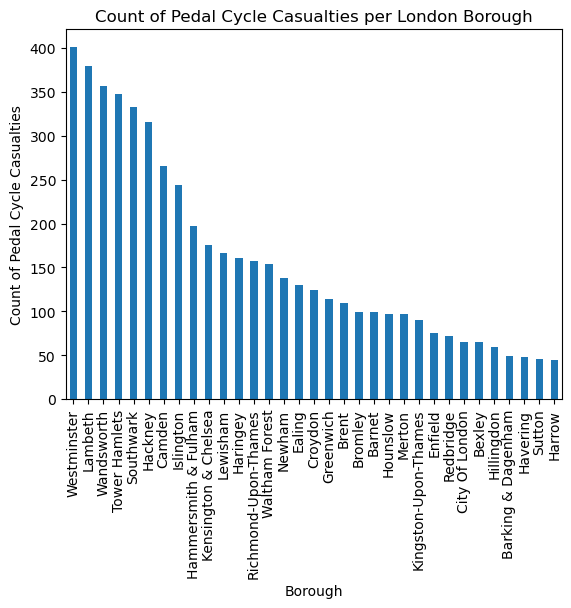

In [5]:
# Plot count of casualties per borough

# Filter to only show Pedal Cycles casualties
borough_casualties = df2[df2["Casualty Mode of Travel"] == "Pedal Cycle"]

# Count casualties per borough
borough_casualties_count = borough_casualties["Borough Name"].value_counts()

# Sort borough casualties count in descending order
borough_casualties_count = borough_casualties_count.sort_values(ascending=False)

# Plot the count of casualties per borough
borough_casualties_count.plot(kind="bar")
plt.xlabel("Borough")
plt.ylabel("Count of Pedal Cycle Casualties")
plt.title("Count of Pedal Cycle Casualties per London Borough")
plt.show()

In [6]:
casualties_per_mode_2021 = df2.groupby("Casualty Mode of Travel").size().sort_values(ascending = False)
print(casualties_per_mode_2021)
print(casualties_per_mode_2021.sum())

Casualty Mode of Travel
Car                  9100
Powered 2 Wheeler    6006
Pedal Cycle          5277
Pedestrian           3837
Bus Or Coach          866
Goods Vehicle         495
Other Vehicle         491
Taxi                  342
Private Hire          257
dtype: int64
26671


In [7]:
# 2020 collision dataset

# Read the xlsx file into a DataFrame
df3 = pd.read_csv("2020-gla-data-extract-casualty.csv")
df3.head()

,Accident Ref.,Borough,Boro,Easting,Northing,CREFNO,Casualty Class,Casualty Sex,Casualty Age (Banded),Casualty Age,No. of Casualties,Casualty Severity,Ped. Location,Ped. Movement,Mode of Travel,
0,1200240171,CITY OF LONDON,0,531188,181609,1,1 DRIVER/RIDER,1 MALE,25-59,30.0,1,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,3 POWERED 2 WHEELER,NaN
1,1200246170,CITY OF LONDON,0,533386,181909,1,1 DRIVER/RIDER,1 MALE,25-59,29.0,1,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,2 PEDAL CYCLE,NaN
2,1200246170,CITY OF LONDON,0,533386,181909,2,1 DRIVER/RIDER,'-1 UNKNOWN,UNKNOWN,NaN,1,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,2 PEDAL CYCLE,NaN
3,1200248479,CITY OF LONDON,0,533359,181760,1,1 DRIVER/RIDER,1 MALE,25-59,30.0,1,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,2 PEDAL CYCLE,NaN
4,1200251644,CITY OF LONDON,0,532122,181853,1,1 DRIVER/RIDER,2 FEMALE,25-59,27.0,1,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,2 PEDAL CYCLE,NaN


In [8]:
casualties_per_mode_2020 = df3.groupby("Mode of Travel").size().sort_values(ascending = False)
print(casualties_per_mode_2020)
print(casualties_per_mode_2020.sum())

Mode of Travel
4 CAR                  8852
3 POWERED 2 WHEELER    5012
2 PEDAL CYCLE          4789
1 PEDESTRIAN           3677
6 BUS OR COACH          645
7 GOODS VEHICLE         485
5 TAXI                  346
8 OTHER VEHICLE         308
9 PRIVATE HIRE          231
dtype: int64
24345


In [9]:
# 2019 collision dataset

# Read the xlsx file into a DataFrame
df4 = pd.read_csv("2019-gla-data-extract-casualty.csv")
df4.head()

,AREFNO,Borough,Boro,Easting,Northing,CREFNO,Casualty Class,Casualty Sex,Casualty Age (Banded),Casualty Age,No. of Casualties,Casualty Severity,Ped Location,Ped Movement,Mode of Travel
0,1190128300,WESTMINSTER,1,528218,180407,1,1 DRIVER/RIDER,1 MALE,25-59,58.0,3,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,4 CAR
1,1190128300,WESTMINSTER,1,528218,180407,2,2 PASSENGER,2 FEMALE,U,NaN,3,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,4 CAR
2,1190128300,WESTMINSTER,1,528218,180407,3,2 PASSENGER,2 FEMALE,U,NaN,3,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,4 CAR
3,1190152270,LAMBETH,9,530219,172463,1,1 DRIVER/RIDER,2 FEMALE,16-24,24.0,1,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,4 CAR
4,1190155191,CAMDEN,2,530222,182543,1,2 PASSENGER,2 FEMALE,16-24,21.0,1,3 SLIGHT,'-2 NOT APPLICABLE,'-2 NOT APPLICABLE,2 PEDAL CYCLE


In [10]:
casualties_per_mode_2019 = df4.groupby("Mode of Travel").size().sort_values(ascending = False)
print(casualties_per_mode_2019)
print(casualties_per_mode_2019.sum())

Mode of Travel
4 CAR                  11457
1 PEDESTRIAN            5662
3 POWERED 2 WHEELER     5391
2 PEDAL CYCLE           4634
6 BUS OR COACH          1174
7 GOODS VEHICLE          594
5 TAXI                   521
9 PRIVATE HIRE           425
8 OTHER VEHICLE          149
dtype: int64
30007


In [11]:
# 2018 collision dataset

# Read the xlsx file into a DataFrame
df5 = pd.read_csv("2018-data-files-casualty.csv")
df5.head()

,Accident Ref.,Borough,Boro,Easting,Northing,CREFNO,Casualty Class,Casualty Sex,Casualty Age (Banded),Casualty Age,No. of Casualties,Casualty Severity,Ped. Location,Ped. Movement,Mode of Travel,
0,1180087514,CITY OF LONDON,0,533090,181120,1,3 Pedestrian,2 Female,16-24,24,1,3 Slight,06 On Footpath - Verge,9 Unknown Or Other,1 Pedestrian,
1,1180104854,CITY OF LONDON,0,533650,180200,1,1 Driver/Rider,2 Female,16-24,21,1,3 Slight,-2 Unknown,-2 N/A,4 Car,
2,1180104878,CITY OF LONDON,0,531860,181830,1,1 Driver/Rider,1 Male,25-59,32,1,3 Slight,-2 Unknown,-2 N/A,2 Pedal Cycle,
3,1180108670,CITY OF LONDON,0,531109,180810,1,1 Driver/Rider,1 Male,Unknown,0,1,3 Slight,-2 Unknown,-2 N/A,2 Pedal Cycle,
4,1180118053,CITY OF LONDON,0,533834,180877,1,1 Driver/Rider,1 Male,25-59,57,1,3 Slight,-2 Unknown,-2 N/A,2 Pedal Cycle,


In [12]:
casualties_per_mode_2018 = df5.groupby("Mode of Travel").size().sort_values(ascending = False)
print(casualties_per_mode_2018)
print(casualties_per_mode_2018.sum())

Mode of Travel
4 Car                  11804
1 Pedestrian            5762
3 Powered 2 Wheeler     5122
2 Pedal Cycle           4755
6 Bus Or Coach          1451
5 Taxi                   957
7 Goods Vehicle          634
8 Other Vehicle          106
dtype: int64
30591


In [13]:
# 2017 collision dataset

# Read the xlsx file into a DataFrame
df6 = pd.read_csv("2017-data-casualty.csv")
df6.head()

,Accident Ref.,Borough,Boro,Easting,Northing,CREFNO,Casualty Class,Casualty Sex,Casualty Age (Banded),Casualty Age,No. of Casualties,Casualty Severity,Ped. Location,Ped. Movement,Mode of Travel,
0,1170014045,CITY OF LONDON,0,532780,180350,1,1 Driver/Rider,1 Male,25-59,34,1,3 Slight,-2 Unknown,-2 N/A,2 Pedal Cycle,
1,1170014113,CITY OF LONDON,0,533841,180787,1,1 Driver/Rider,2 Female,25-59,35,1,3 Slight,-2 Unknown,-2 N/A,2 Pedal Cycle,
2,1170017232,CITY OF LONDON,0,533630,181200,1,3 Pedestrian,1 Male,25-59,37,1,3 Slight,01 Crossing Road On Ped Xing,9 Unknown Or Other,1 Pedestrian,
3,1170019554,CITY OF LONDON,0,531130,181110,1,3 Pedestrian,1 Male,25-59,29,1,2 Serious,01 Crossing Road On Ped Xing,3 From Drivers O/Side,1 Pedestrian,
4,1170020053,CITY OF LONDON,0,531900,181840,1,3 Pedestrian,1 Male,25-59,36,1,2 Serious,09 In Road - Not Crossing,7 In Rd Facing Traffic,1 Pedestrian,


In [14]:
casualties_per_mode_2017 = df6.groupby("Mode of Travel").size().sort_values(ascending = False)
print(casualties_per_mode_2017)
print(casualties_per_mode_2017.sum())

Mode of Travel
4 Car                  12375
1 Pedestrian            6652
3 Powered 2 Wheeler     5577
2 Pedal Cycle           4521
6 Bus Or Coach          1752
5 Taxi                   904
7 Goods Vehicle          611
8 Other Vehicle          175
dtype: int64
32567


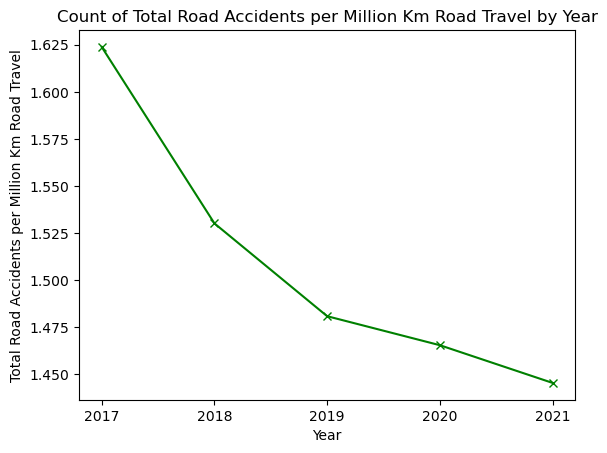

In [23]:
# Create a DataFrame
total_casualties = pd.DataFrame({
    "Year": ["2017", "2018", "2019", "2020", "2021"],
    "Total Casualties": [32567, 30591, 30007, 24345, 26671],
    "Total Km Road Travel": [20055359109, 19992861706, 20264369690, 16613638242, 18453291284],
    "Total Casualties - Speed Limit <= 20 MPH": [6274, 7156, 8505, 8747, 11471]
})

# Calculate Total Road Accidents per Million Km Road Travel
total_casualties["Total Road Accidents per Million Km Road Travel"] = (total_casualties["Total Casualties"] / total_casualties["Total Km Road Travel"]) * 1000000

# Plot the DataFrame
fig, ax = plt.subplots()
ax.plot(total_casualties["Year"], total_casualties["Total Road Accidents per Million Km Road Travel"], color="g", marker="x")

# Add a title and labels
plt.title("Count of Total Road Accidents per Million Km Road Travel by Year")
plt.xlabel("Year")
plt.ylabel("Total Road Accidents per Million Km Road Travel")

plt.show()

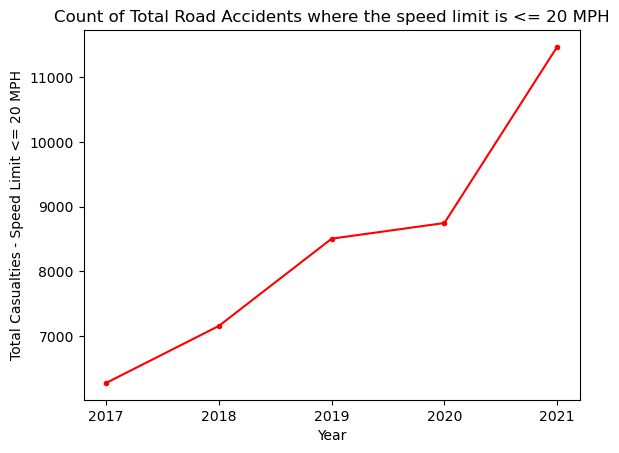

In [24]:
# Plot Total Casualties - Speed Limit
fig, ax = plt.subplots()
ax.plot(total_casualties["Year"], total_casualties["Total Casualties - Speed Limit <= 20 MPH"], color="r", marker=".")

# Add a title and labels
plt.title("Count of Total Road Accidents where the speed limit is <= 20 MPH")
plt.xlabel("Year")
plt.ylabel("Total Casualties - Speed Limit <= 20 MPH")

plt.show()

In [15]:
df_attendant_2018 = pd.read_csv("2018-data-files-attendant.csv")
df_attendant_2018.head()

# Join 2018 datasets
df2018 = pd.merge(df5, df_attendant_2018, on='Accident Ref.')
df2018.head()

# Group number of casualties by speed limit
# print(df2018.groupby("Speed Limit").sum())

sl_casualties2018 = df2018.groupby("Speed Limit").size().sort_values(ascending = False)
print(sl_casualties2018)
print(sl_casualties2018.sum())

Speed Limit
2 30 MPH       20374
1 <= 20 MPH     7156
3 40 MPH        1690
4 50 MPH         979
6 70 MPH         323
5 60 MPH          69
dtype: int64
30591


In [90]:
df_attendant_2019 = pd.read_csv("2019-gla-data-extract-attendant.csv")
df_attendant_2019.head()

# Rename column
df_attendant_2019 = df_attendant_2019.rename(columns={'Accident Ref': 'AREFNO'})

# Join 2019 datasets
df2019 = pd.merge(df4, df_attendant_2019, on='AREFNO')
df2019.head()

# Group number of casualties by speed limit

sl_casualties2019 = df2019.groupby("Speed Limit").size().sort_values(ascending = False)
print(sl_casualties2019)
print(sl_casualties2019.sum())

Speed Limit
30    18581
20     8434
40     1650
50      910
70      292
60       65
10       48
5        17
15        6
25        4
dtype: int64
30007


In [16]:
df_attendant_2020 = pd.read_csv("2020-gla-data-extract-attendant.csv")
df_attendant_2020.head()

# Rename column
df_attendant_2020 = df_attendant_2020.rename(columns={'Accident Ref': 'Accident Ref.'})

# Join 2020 datasets
df2020 = pd.merge(df3, df_attendant_2020, on='Accident Ref.')
df2020.head()

# Group number of casualties by speed limit

sl_casualties2020 = df2020.groupby("Speed Limit").size().sort_values(ascending = False)
print(sl_casualties2020)
print(sl_casualties2020.sum())

Speed Limit
30    13340
20     8658
40     1335
50      689
70      180
10       50
60       49
5        29
15        7
25        5
1         1
2         1
18        1
dtype: int64
24345


In [17]:
df_attendant_2021 = pd.read_csv("jan-dec-2021-gla-data-extract-attendant.csv", header=1)
df_attendant_2021.head()

# Drop the last row = 
df_attendant_2021 = df_attendant_2021.iloc[:-1]

df_attendant_2021["_Collision Id"] = df_attendant_2021["_Collision Id"].apply(pd.to_numeric)

In [18]:
# Join 2021 datasets
df2021 = pd.merge(df2, df_attendant_2021, on="_Collision Id")
df2021.head()

# Group number of casualties by speed limit

sl_casualties2021 = df2021.groupby("Speed Limit").size().sort_values(ascending = False)
print(sl_casualties2021)
print(sl_casualties2021.sum())

Speed Limit
30.0     12831
20.0     11351
40.0      1307
50.0       795
70.0       205
10.0        54
60.0        48
5.0         37
15.0        21
25.0         4
13.0         3
38.0         2
1.0          2
36.0         1
2.0          1
29.0         1
45.0         1
21.0         1
14.0         1
8.0          1
80.0         1
220.0        1
300.0        1
301.0        1
dtype: int64
26671


In [21]:
file_encoding = 'utf8'        # set file_encoding to the file encoding (utf8, latin1, etc.)
input_fd = open("2017-data-attendant.csv", encoding=file_encoding, errors = 'backslashreplace')
df_attendant_2017 = pd.read_csv(input_fd)
df_attendant_2017.head()

# Join 2017 datasets
df2017 = pd.merge(df6, df_attendant_2017, on="Accident Ref.")
df2017.head()

# Group number of casualties by speed limit

sl_casualties2017 = df2017.groupby("Speed Limit").size().sort_values(ascending = False)
print(sl_casualties2017)
print(sl_casualties2017.sum())

Speed Limit
2 30 MPH       23138
1 <= 20 MPH     6274
3 40 MPH        1776
4 50 MPH         975
6 70 MPH         315
5 60 MPH          88
7 Not Coded        1
dtype: int64
32567
